# Контекст
Кредитные карты являются распространенным методом контроля рисков в финансовой отрасли. Он использует личную информацию и данные, представленные заявителями кредитных карт, для прогнозирования вероятности будущих дефолтов и заимствований по кредитным картам. Банк может принять решение о выдаче кредитной карты заявителю. Кредитные баллы могут объективно количественно оценить величину риска.

Вообще говоря, кредитные карты основаны на исторических данных. Однажды столкнувшись с большими экономическими колебаниями. Прошлые модели могут утратить свою первоначальную предсказательную силу. Логистическая модель является распространенным методом кредитного скоринга. Потому что логистика подходит для задач бинарной классификации и может вычислять коэффициенты каждого признака. Чтобы облегчить понимание и работу, оценочная карта умножит коэффициент логистической регрессии на определенное значение (например, 100) и округлит его.

# Задача
Постройте модель машинного обучения, чтобы предсказать, является ли кандидат "хорошим" или "плохим" клиентом, в отличие от других задач, определение "хорошего" или "плохого" не дается. Проблема несбалансированности данных является большой проблемой в этой задаче.

# Данные
**application_record.csv**

Имя функции | Объяснение 
- | -------
 ID |	Номер клиента	| 
CODE_GENDER |	Пол	
FLAG_OWN_CAR |	Есть ли машина	
FLAG_OWN_REALTY |	Есть ли собственность	
CNT_CHILDREN |	Количество детей	
AMT_INCOME_TOTAL |	Годовой доход	
NAME_INCOME_TYPE |	Категория дохода	
NAME_EDUCATION_TYPE |	Уровень образования	
NAME_FAMILY_STATUS |	Семейное положение	
NAME_HOUSING_TYPE |	Образ жизни	
DAYS_BIRTH |	День рождения	Отсчет назад от текущего дня (0), -1 означает вчерашний день
DAYS_EMPLOYED |	Дата начала работы	Отсчет назад от текущего дня(0). Если положительный, то это означает, что человек в настоящее время безработный.
FLAG_MOBIL |	Есть ли мобильный телефон	
FLAG_WORK_PHONE |	Есть ли рабочий телефон	
FLAG_PHONE |	Есть ли здесь телефон	
FLAG_EMAIL |	Есть ли электронная почта	
OCCUPATION_TYPE |	Занятость	
CNT_FAM_MEMBERS |	Размер семьи

**credit_record.csv**

Имя функции | Объяснение 
- | -------
ID |	Номер клиента	|
MONTHS_BALANCE	| Рекордный месяц	извлеченных данных является отправной точкой, наоборот, 0-текущий месяц, -1-предыдущий месяц и так далее
STATUS |	Статус	0: 1-29 дней просрочки 1: 30-59 дней просрочки 2: 60-89 дней просрочки 3: 90-119 дней просрочки 4: 120-149 дней просрочки 5: Просроченные или безнадежные долги, списания более чем на 150 дней C: погашены в этом месяце X: Нет кредита за месяц

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
app = pd.read_csv("application_record.csv")
crecord = pd.read_csv("credit_record.csv")

In [ ]:
app.info()
app.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
crecord.info()
crecord.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
# общее количество строк составляет 438557. Это означает, что у него есть дубликаты
app['ID'].nunique() 

438510

In [ ]:
# crecord имеет 45985 уникальных строк, так как есть повторяющиеся записи для разных ежемесячных значений и статуса.
crecord['ID'].nunique() 

45985

In [ ]:
# проверка соответствия количества записей в двух наборах данных
len(set(crecord['ID']).intersection(set(app['ID'])))

36457

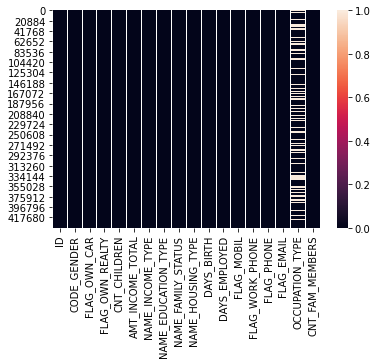

In [ ]:
# проверка на наличие нулевых значений. occupation_type (занятость) имеет много пропусков
sns.heatmap(app.isnull())

In [ ]:
# мы определили, что в этом наборе данных есть некоторые дубликаты
# мы удалим эти дубликаты и сохраним последнюю запись идентификатора, если она повторится.
app = app.drop_duplicates('ID', keep='last')

In [ ]:
#ранее мы определили, что occupation_type имеет много пропущенных значений
# мы отбросим эту колонку
app.drop('OCCUPATION_TYPE', axis=1, inplace=True) 

In [ ]:
# мы фильтруем столбцы, которые имеют категориальные значения, чтобы увидеть, полезны ли они
object = pd.DataFrame(app.dtypes =='object').reset_index()
object_type = object[object[0] == True]['index']
object_type

1            CODE_GENDER
2           FLAG_OWN_CAR
3        FLAG_OWN_REALTY
6       NAME_INCOME_TYPE
7    NAME_EDUCATION_TYPE
8     NAME_FAMILY_STATUS
9      NAME_HOUSING_TYPE
Name: index, dtype: object

In [ ]:
# выбираем числовые значения
num_type = pd.DataFrame(app.dtypes != 'object').reset_index().rename(columns =  {0:'yes/no'})
num_type = num_type[num_type['yes/no'] ==True]['index']
num_type

0                   ID
4         CNT_CHILDREN
5     AMT_INCOME_TOTAL
10          DAYS_BIRTH
11       DAYS_EMPLOYED
12          FLAG_MOBIL
13     FLAG_WORK_PHONE
14          FLAG_PHONE
15          FLAG_EMAIL
16     CNT_FAM_MEMBERS
Name: index, dtype: object

In [ ]:
a = app[object_type]['CODE_GENDER'].value_counts()
b = app[object_type]['FLAG_OWN_CAR'].value_counts()
c = app[object_type]['FLAG_OWN_REALTY'].value_counts()
d = app[object_type]['NAME_INCOME_TYPE'].value_counts()
e = app[object_type]['NAME_EDUCATION_TYPE'].value_counts()
f = app[object_type]['NAME_FAMILY_STATUS'].value_counts()
g = app[object_type]['NAME_HOUSING_TYPE'].value_counts()

print( a,"\n",b,'\n', c, '\n', d, '\n', e, '\n', f, '\n', g)

#это просто для того, чтобы увидеть, что представляет собой каждый столбец.
#Кажется, что все они важны, так как в каждом столбце есть своя классификация.
# об их эффективности в данный момент нельзя судить, поэтому мы преобразуем их все в числовые значения.

F    294412
M    144098
Name: CODE_GENDER, dtype: int64 
 N    275428
Y    163082
Name: FLAG_OWN_CAR, dtype: int64 
 Y    304043
N    134467
Name: FLAG_OWN_REALTY, dtype: int64 
 Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64 
 Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64 
 Married                 299798
Single / not married     55268
Civil marriage           36524
Separated                27249
Widow                    19671
Name: NAME_FAMILY_STATUS, dtype: int64 
 House / apartment      393788
With parents            19074
Municipal apartment     14213
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAM

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in app:
    if app[x].dtypes=='object':
        app[x] = le.fit_transform(app[x])

In [ ]:
app[object_type].head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,1,1,1,4,1,0,4
1,1,1,1,4,1,0,4
2,1,1,1,4,4,1,1
3,0,0,1,0,4,3,1
4,0,0,1,0,4,3,1


In [ ]:
app[num_type].head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0


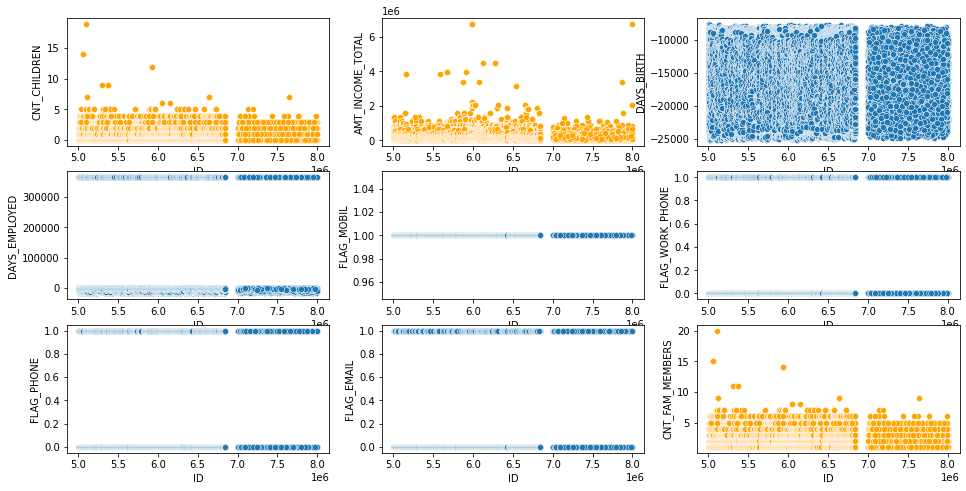

In [ ]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (16,8))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[2][2], color= 'orange')

Есть выбросы в 3 колонках.

* CNT_CHILDREN
* AMT_INCOME_TOTAL
* CNT_FAM_MEMBERS

Нам нужно удалить эти выбросы, чтобы убедиться, что они не влияют на результаты нашей модели.

In [ ]:
q_hi = app['CNT_CHILDREN'].quantile(0.999)
q_low = app['CNT_CHILDREN'].quantile(0.001)
app = app[(app['CNT_CHILDREN']>q_low) & (app['CNT_CHILDREN']<q_hi)]

In [ ]:
q_hi = app['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = app['AMT_INCOME_TOTAL'].quantile(0.001)
app= app[(app['AMT_INCOME_TOTAL']>q_low) & (app['AMT_INCOME_TOTAL']<q_hi)]

In [ ]:
q_hi = app['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = app['CNT_FAM_MEMBERS'].quantile(0.001)
app= app[(app['CNT_FAM_MEMBERS']>q_low) & (app['CNT_FAM_MEMBERS']<q_hi)]

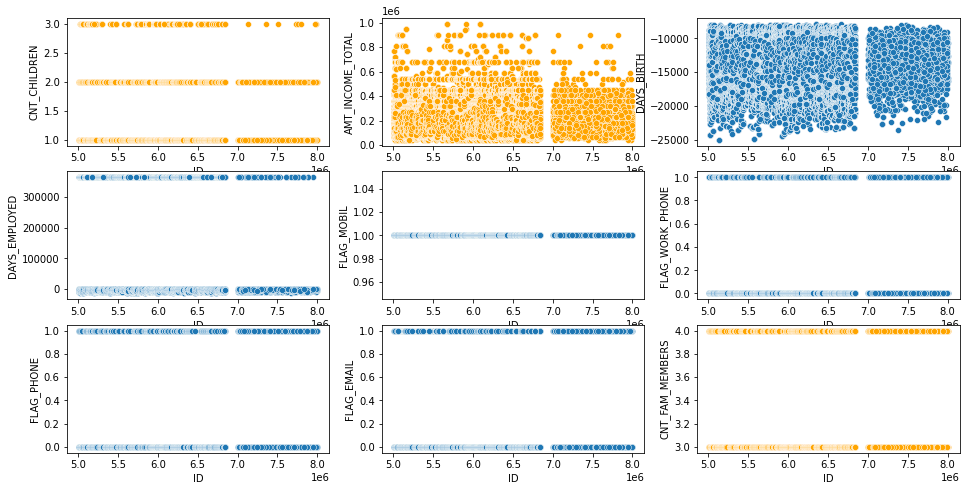

In [ ]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (16,8))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[2][2], color= 'orange')

In [ ]:
# мы рассчитали месяцы из столбца "сегодня", чтобы узнать, сколько лет месяцу
# мы также сортируем данные по столбцам ID и месяцам с сегодняшнего дня.

crecord['Months from today'] = crecord['MONTHS_BALANCE']*-1
crecord = crecord.sort_values(['ID','Months from today'], ascending=True)
crecord.head(15)

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,2
3,5001711,-3,0,3
4,5001712,0,C,0
5,5001712,-1,C,1
6,5001712,-2,C,2
7,5001712,-3,C,3
8,5001712,-4,C,4
9,5001712,-5,C,5


In [ ]:
crecord['STATUS'].value_counts() 

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [ ]:
# замените значения C и X на 0, так как это один и тот же тип
# 1,2,3,4,5 классифицируются как 1, потому что они одного типа
# это будут наши метки/результаты прогнозирования для нашей модели
crecord['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
crecord['STATUS'] = crecord['STATUS'].astype('int')
crecord['STATUS'] = crecord['STATUS'].apply(lambda x:1 if x >= 2 else 0)

In [ ]:
crecord['STATUS'].value_counts(normalize=True) 

0    0.99704
1    0.00296
Name: STATUS, dtype: float64

In [ ]:
# здесь есть проблема
# данные пересчитываются для меток
# 0 - это 99%
# 1 - это только 1% во всем наборе данных
# нам нужно будет решить проблему избыточной выборки, чтобы понять смысл нашего анализа
# это будет сделано после того, как мы объединим оба набора данных
# итак, сначала мы присоединимся к наборам данных

In [ ]:
#мы группируем данные в crecord по идентификатору, чтобы мы могли объединить их с приложением
crecordgb = crecord.groupby('ID').agg(max).reset_index()
crecordgb.head(10)

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,0,3
1,5001712,0,0,18
2,5001713,0,0,21
3,5001714,0,0,14
4,5001715,0,0,59
5,5001717,0,0,21
6,5001718,0,0,38
7,5001719,0,0,42
8,5001720,0,0,35
9,5001723,0,0,30


In [ ]:
df = app.join(crecordgb.set_index('ID'), on='ID', how='inner')
df.drop(['Months from today', 'MONTHS_BALANCE'], axis=1, inplace=True)
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
29,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
30,5008839,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
31,5008840,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
32,5008841,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
33,5008842,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9516 entries, 29 to 434805
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9516 non-null   int64  
 1   CODE_GENDER          9516 non-null   int64  
 2   FLAG_OWN_CAR         9516 non-null   int64  
 3   FLAG_OWN_REALTY      9516 non-null   int64  
 4   CNT_CHILDREN         9516 non-null   int64  
 5   AMT_INCOME_TOTAL     9516 non-null   float64
 6   NAME_INCOME_TYPE     9516 non-null   int64  
 7   NAME_EDUCATION_TYPE  9516 non-null   int64  
 8   NAME_FAMILY_STATUS   9516 non-null   int64  
 9   NAME_HOUSING_TYPE    9516 non-null   int64  
 10  DAYS_BIRTH           9516 non-null   int64  
 11  DAYS_EMPLOYED        9516 non-null   int64  
 12  FLAG_MOBIL           9516 non-null   int64  
 13  FLAG_WORK_PHONE      9516 non-null   int64  
 14  FLAG_PHONE           9516 non-null   int64  
 15  FLAG_EMAIL           9516 non-null 

## Обучение моделей

In [ ]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]  # STATUS

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
# масштабируем данные
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)

**Балансировка избытончного класса**

SMOTE (метод передискретизации синтетического меньшинства) — один из наиболее часто используемых методов передискретизации для решения проблемы дисбаланса.
Он направлен на то, чтобы сбалансировать распределение классов путем случайного увеличения примеров классов меньшинства путем их тиражирования.

In [ ]:
# SMOTE проблема передискретизации
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_balanced, y_balanced = sm.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = sm.fit_resample(X_test_scaled, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_train.value_counts()

0    7491
1     121
Name: STATUS, dtype: int64

In [ ]:
pd.Series(y_balanced).value_counts()

1    7491
0    7491
dtype: int64

In [ ]:
y_test.value_counts()

0    1874
1      30
Name: STATUS, dtype: int64

In [ ]:
pd.Series(y_test_balanced).value_counts()

1    1874
0    1874
dtype: int64

Типы меток теперь сбалансированы, проблема передискретизации решена, теперь мы будем реализовывать различные модели, чтобы увидеть, какая из них работает лучше всего

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "XGBoost" : XGBClassifier()
}

In [ ]:
train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_balanced, y_balanced)
    train_score = classifier.score(X_balanced, y_balanced)
    train_scores.append(train_score)
    test_score = classifier.score(X_test_balanced, y_test_balanced)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

[0.6095314377252703, 0.9842477639834468, 0.9249766386330263, 0.9941262848751835, 0.9941262848751835, 0.94606861567214]
[0.554162219850587, 0.7342582710779082, 0.756136606189968, 0.8135005336179295, 0.8084311632870864, 0.8884738527214514]


модель XGBoost лучше всего работает на тренировочном наборе, а также на тестовом наборе с точностью 88%
Мы будем использовать XGBoost для прогнозирования наших значений.

In [ ]:
xgb = XGBClassifier()
model = xgb.fit(X_balanced, y_balanced)
prediction = xgb.predict(X_test_balanced)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced, prediction))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1874
           1       0.95      0.82      0.88      1874

    accuracy                           0.89      3748
   macro avg       0.90      0.89      0.89      3748
weighted avg       0.90      0.89      0.89      3748

